In [1]:
# gerekli kutuphaneleri indir
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup

In [2]:
# Gerekli NLTK kaynaklarını indir
nltk.download("punkt")
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Veri yükleme
IMDB = pd.read_csv("IMDB Dataset.csv")
df = IMDB.copy()

In [4]:
# Veri kesfi
print(df.head())

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None


In [6]:
print(df.describe())

                                                   review sentiment
count                                               50000     50000
unique                                              49582         2
top     Loved today's show!!! It was a variety and not...  positive
freq                                                    5     25000


C:\Users\user\AppData\Local\Temp\ipykernel_10468\2832245534.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df, palette=custom_palette)


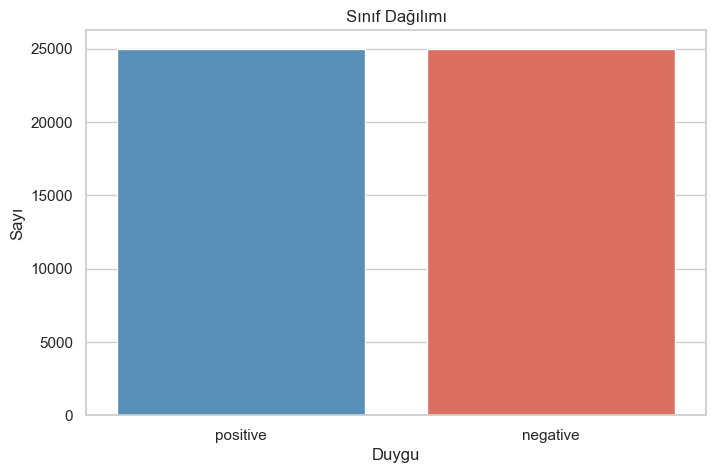

In [79]:
# veri gorsellestirme - sinif dagilimi

# Renk paletini manuel olarak sınıflara atama
custom_palette = {"negative": sns.color_palette("Reds_d")[1],  
                  "positive": sns.color_palette("Blues_d")[2]}  

# Grafiği oluştur
plt.figure(figsize=(8, 5))
sns.countplot(x="sentiment", data=df, palette=custom_palette)
plt.title("Sınıf Dağılımı")
plt.xlabel("Duygu")
plt.ylabel("Sayı")
plt.show()

## 1. Veri Ön İşleme

In [8]:
# Metin temizleme fonksiyonu
def clean_text(text):
    # Küçük harfe çevirme
    text = text.lower()
    
    # Rakamları temizleme
    text = re.sub(r"\d+", "", text)
    
    # Özel karakterleri temizleme
    text = re.sub(r"[^\w\s]", "", text)
    
    # Tek ve iki harfli kelimeleri temizleme
    text = " ".join([word for word in text.split() if len(word) > 2])
    
    # Stop words'leri kaldırma
    stop_words = set(stopwords.words("english"))
    text = " ".join([word for word in text.split() if word not in stop_words])
    
    # HTML veya URL etiketlerini temizleme
    text = BeautifulSoup(text, "html.parser").get_text()
    
    return text

# Metin temizleme
df["cleaned_review"] = df["review"].apply(clean_text)


In [9]:
df.head()

,review,sentiment,cleaned_review
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching episode youll...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...


In [10]:
# Yorumları kelime ve cümle bazında tokenleştirme
df["word_tokens"] = df["cleaned_review"].apply(word_tokenize)
df["sentence_tokens"] = df["cleaned_review"].apply(sent_tokenize)

df.head()

,review,sentiment,cleaned_review,word_tokens,sentence_tokens
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching episode youll...,"[one, reviewers, mentioned, watching, episode,...",[one reviewers mentioned watching episode youl...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,"[wonderful, little, production, filming, techn...",[wonderful little production filming technique...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su...",[thought wonderful way spend time hot summer w...
3,Basically there's a family where a little boy ...,negative,basically theres family little boy jake thinks...,"[basically, theres, family, little, boy, jake,...",[basically theres family little boy jake think...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,...",[petter matteis love time money visually stunn...


In [11]:
# Stemming ve Lemmatization uygulama (kelimeleri koklerine indirgemek)
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def apply_stemming(tokens):
    return [stemmer.stem(word) for word in tokens]

def apply_lemmatization(tokens):
    return [lemmatizer.lemmatize(word) for word in tokens]

In [12]:
# Kelimelere stemming ve lemmatization uygulama
df["stemmed_tokens"] = df["word_tokens"].apply(apply_stemming)
df["lemmatized_tokens"] = df["word_tokens"].apply(apply_lemmatization)

# İşlenen verinin ilk satırlarını kontrol etme
df2=df.head()
print(df2)

                                              review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                      cleaned_review  \
0  one reviewers mentioned watching episode youll...   
1  wonderful little production filming technique ...   
2  thought wonderful way spend time hot summer we...   
3  basically theres family little boy jake thinks...   
4  petter matteis love time money visually stunni...   

                                         word_tokens  \
0  [one, reviewers, mentioned, watching, episode,...   
1  [wonderful, little, production, filming, techn...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, theres, family, little, boy

In [13]:
# Sentiment encoding (pozitif: 1, negatif: 0)
df["sentiment_encoded"] = df["sentiment"].apply(lambda x: 1 if x == "positive" else 0)

# Sonuçları kontrol etme
print(df[["sentiment", "sentiment_encoded"]].head())

  sentiment  sentiment_encoded
0  positive                  1
1  positive                  1
2  positive                  1
3  negative                  0
4  positive                  1


In [14]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test setlerine ayırma
X = df["cleaned_review"]
y = df["sentiment_encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Eğitim ve test setlerinin boyutlarını kontrol etme
print(f"Eğitim seti boyutu: {X_train.shape[0]}")
print(f"Test seti boyutu: {X_test.shape[0]}")

Eğitim seti boyutu: 40000
Test seti boyutu: 10000


## 2. Duygu Analizi

In [15]:
# TF-IDF Kullanarak metinleri sayısallaştırma

from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# TF-IDF vektörizasyonu
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # En sık geçen 5000 kelime

# Eğitim verisi ile fit, test verisi ile transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train) # Eğitim setini fit ve transform et
X_test_tfidf = tfidf_vectorizer.transform(X_test)      # Test setini sadece transform et

# Sonuçları kontrol etme
print(f"Eğitim seti için TF-IDF matrisi şekli: {X_train_tfidf.shape}")
print(f"Test seti için TF-IDF matrisi şekli: {X_test_tfidf.shape}")

Eğitim seti için TF-IDF matrisi şekli: (40000, 5000)
Test seti için TF-IDF matrisi şekli: (10000, 5000)


In [16]:
# Eğitim seti için TF-IDF Matrisi ilk 5 satırı DataFrame formatında görmek

# TF-IDF matrisini DataFrame'e çevirme
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# İlk 5 satırı görüntüleme
print(X_train_tfidf_df.head())

   abandoned  abc  abilities   ability  able  aboutbr  absence  absent  \
0        0.0  0.0        0.0  0.086097   0.0      0.0      0.0     0.0   
1        0.0  0.0        0.0  0.000000   0.0      0.0      0.0     0.0   
2        0.0  0.0        0.0  0.000000   0.0      0.0      0.0     0.0   
3        0.0  0.0        0.0  0.000000   0.0      0.0      0.0     0.0   
4        0.0  0.0        0.0  0.000000   0.0      0.0      0.0     0.0   

   absolute  absolutely  ...  youll  young  younger  youre  youth  youve  \
0       0.0    0.065804  ...    0.0    0.0      0.0    0.0    0.0    0.0   
1       0.0    0.000000  ...    0.0    0.0      0.0    0.0    0.0    0.0   
2       0.0    0.000000  ...    0.0    0.0      0.0    0.0    0.0    0.0   
3       0.0    0.000000  ...    0.0    0.0      0.0    0.0    0.0    0.0   
4       0.0    0.071302  ...    0.0    0.0      0.0    0.0    0.0    0.0   

   zero  zombie  zombies  zone  
0   0.0     0.0      0.0   0.0  
1   0.0     0.0      0.0   0.0  

In [17]:
# Test seti için ilk 5 satırı DataFrame formatında görmek
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# İlk 5 satırı görüntüleme
print(X_test_tfidf_df.head())

   abandoned  abc  abilities  ability      able  aboutbr  absence  absent  \
0        0.0  0.0        0.0      0.0  0.000000      0.0      0.0     0.0   
1        0.0  0.0        0.0      0.0  0.066613      0.0      0.0     0.0   
2        0.0  0.0        0.0      0.0  0.000000      0.0      0.0     0.0   
3        0.0  0.0        0.0      0.0  0.000000      0.0      0.0     0.0   
4        0.0  0.0        0.0      0.0  0.000000      0.0      0.0     0.0   

   absolute  absolutely  ...  youll  young  younger  youre  youth  youve  \
0       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   
1       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   
2       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   
3       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   
4       0.0         0.0  ...    0.0    0.0      0.0    0.0    0.0    0.0   

       zero  zombie  zombies  zone  
0  0.000000     0.0      0.0   0.0  
1  0.0

In [18]:
# Kelimeler ve TF-IDF ağırlıkları
feature_names = tfidf_vectorizer.get_feature_names_out()
word_counts = X_train_tfidf.sum(axis=0).A1  
word_freq = dict(zip(feature_names, word_counts))

# En yüksek ağırlığa sahip 10 kelimeyi bulma
most_common_words = Counter(word_freq).most_common(10)

# Sonuçları yazdırma
print("En yüksek TF-IDF ağırlığına sahip 10 kelime:")
for word, weight in most_common_words:
    print(f"{word}: {weight}")


En yüksek TF-IDF ağırlığına sahip 10 kelime:
movie: 2284.2358755656187
film: 1931.1967726647404
one: 1299.5451353780932
like: 1122.336253232041
good: 981.1517423656443
really: 842.2250977524807
would: 828.6926331989279
story: 818.230313136888
see: 815.1235402750741
even: 811.0904481939951


C:\Users\user\AppData\Local\Temp\ipykernel_10468\345388911.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_weights), y=list(top_words), palette="Reds_d")


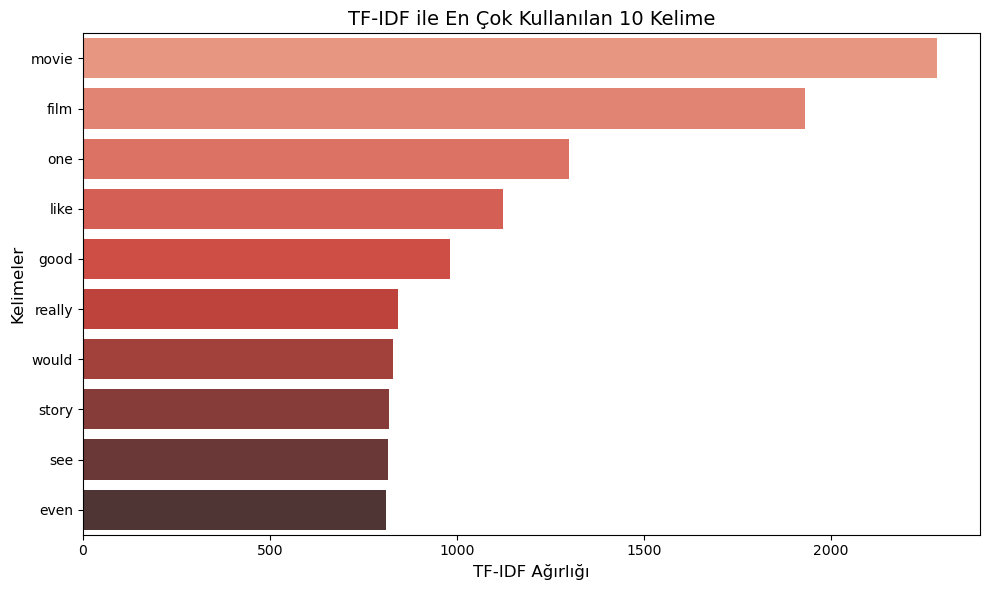

In [19]:
# Kelimeleri ve ağırlıkları ayır
top_words, top_weights = zip(*most_common_words)

# Görselleştirme (Bar Plot)
plt.figure(figsize=(10, 6))
sns.barplot(x=list(top_weights), y=list(top_words), palette="Reds_d")
plt.title("TF-IDF ile En Çok Kullanılan 10 Kelime", fontsize=14)
plt.xlabel("TF-IDF Ağırlığı", fontsize=12)
plt.ylabel("Kelimeler", fontsize=12)
plt.tight_layout()
plt.show()


In [20]:
# Positive ve negative yorum kirilimda tf-idf

# Pozitif ve negatif yorumları filtreleme
positive_reviews = df[df["sentiment_encoded"] == 1]["cleaned_review"]
negative_reviews = df[df["sentiment_encoded"] == 0]["cleaned_review"]

In [21]:
# Pozitif yorumlar için TF-IDF hesaplama
tfidf_vectorizer_pos = TfidfVectorizer(max_features=5000)
X_pos_tfidf = tfidf_vectorizer_pos.fit_transform(positive_reviews)

# Negatif yorumlar için TF-IDF hesaplama
tfidf_vectorizer_neg = TfidfVectorizer(max_features=5000)
X_neg_tfidf = tfidf_vectorizer_neg.fit_transform(negative_reviews)

In [22]:
# Pozitif yorumlar için kelimeler ve ağırlıkları
feature_names_pos = tfidf_vectorizer_pos.get_feature_names_out()
word_counts_pos = X_pos_tfidf.sum(axis=0).A1
word_freq_pos = dict(zip(feature_names_pos, word_counts_pos))

# Negatif yorumlar için kelimeler ve ağırlıkları
feature_names_neg = tfidf_vectorizer_neg.get_feature_names_out()
word_counts_neg = X_neg_tfidf.sum(axis=0).A1
word_freq_neg = dict(zip(feature_names_neg, word_counts_neg))

# En yüksek 10 kelimeyi bulma
from collections import Counter

most_common_words_pos = Counter(word_freq_pos).most_common(10)
print("\nPozitif Yorumlarda En Çok Kullanılan 10 Kelime (TF-IDF):")
for word, weight in most_common_words_pos:
    print(f"{word}: {weight:.4f}")

most_common_words_neg = Counter(word_freq_neg).most_common(10)
print("\nNegatif Yorumlarda En Çok Kullanılan 10 Kelime (TF-IDF):")
for word, weight in most_common_words_neg:
    print(f"{word}: {weight:.4f}")


Pozitif Yorumlarda En Çok Kullanılan 10 Kelime (TF-IDF):
movie: 1326.5452
film: 1242.5099
one: 810.8981
like: 644.5667
good: 624.9508
great: 597.7584
story: 543.2117
see: 534.5113
really: 507.9569
time: 493.6151

Negatif Yorumlarda En Çok Kullanılan 10 Kelime (TF-IDF):
movie: 1522.9714
film: 1165.1039
one: 812.3217
like: 750.8333
bad: 657.4452
good: 603.2481
even: 593.6539
would: 567.0363
really: 547.2666
time: 505.6207


C:\Users\user\AppData\Local\Temp\ipykernel_10468\166801201.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_weights_pos), y=list(top_words_pos), palette="Blues_d")
C:\Users\user\AppData\Local\Temp\ipykernel_10468\166801201.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_weights_neg), y=list(top_words_neg), palette="Reds_d")


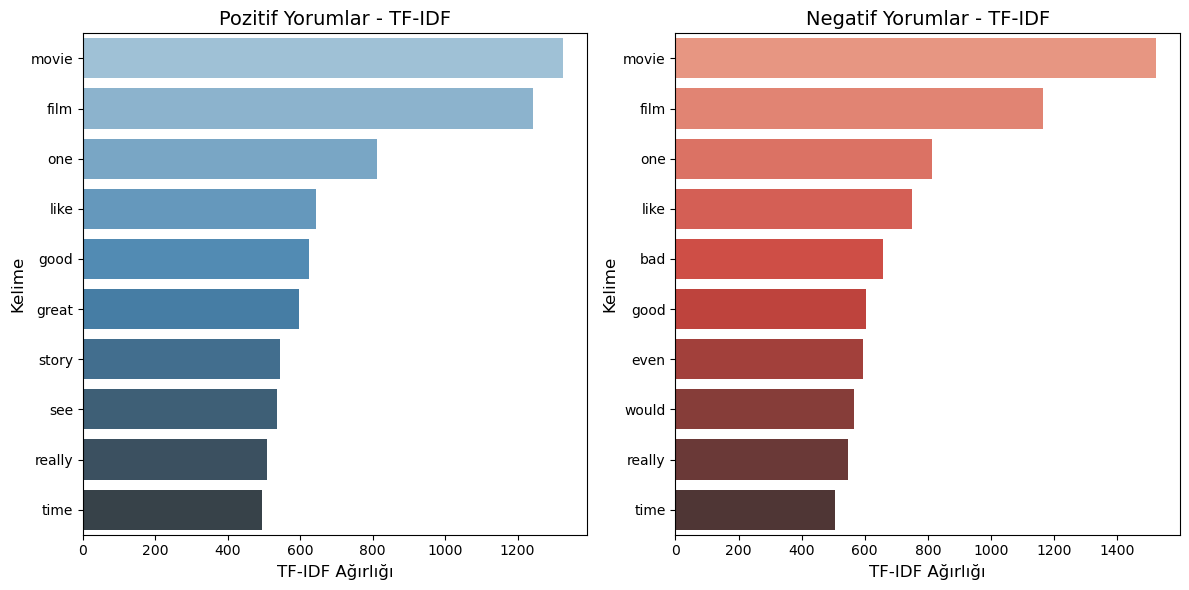

In [23]:
# Görselleştirme için kelimeleri ve ağırlıkları ayır
top_words_pos, top_weights_pos = zip(*most_common_words_pos)
top_words_neg, top_weights_neg = zip(*most_common_words_neg)

# Görselleştirme (Bar Plot)
plt.figure(figsize=(12, 6))

# Pozitif yorumlar için barplot
plt.subplot(1, 2, 1)
sns.barplot(x=list(top_weights_pos), y=list(top_words_pos), palette="Blues_d")
plt.title("Pozitif Yorumlar - TF-IDF", fontsize=14)
plt.xlabel("TF-IDF Ağırlığı", fontsize=12)
plt.ylabel("Kelime", fontsize=12)

# Negatif yorumlar için barplot
plt.subplot(1, 2, 2)
sns.barplot(x=list(top_weights_neg), y=list(top_words_neg), palette="Reds_d")
plt.title("Negatif Yorumlar - TF-IDF", fontsize=14)
plt.xlabel("TF-IDF Ağırlığı", fontsize=12)
plt.ylabel("Kelime", fontsize=12)

plt.tight_layout()
plt.show()

### lojistic regrosyon modeli egitme

In [24]:
#Yorumlarin duyarliligini siniflandirmak icin lojistic regrosyon modelini egitin.

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Lojistik Regresyon Modeli Tanımlama
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Modeli TF-IDF ile Sayısallaştırılmış Eğitim Verileriyle Eğitme
log_reg.fit(X_train_tfidf, y_train)

# Test Verisi Üzerinde Tahmin Yapma
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Model Performansı Değerlendirme
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Test Doğruluk Skoru: {accuracy:.4f}")

Test Doğruluk Skoru: 0.8868


In [25]:
# Sınıflandırma Raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_log_reg))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



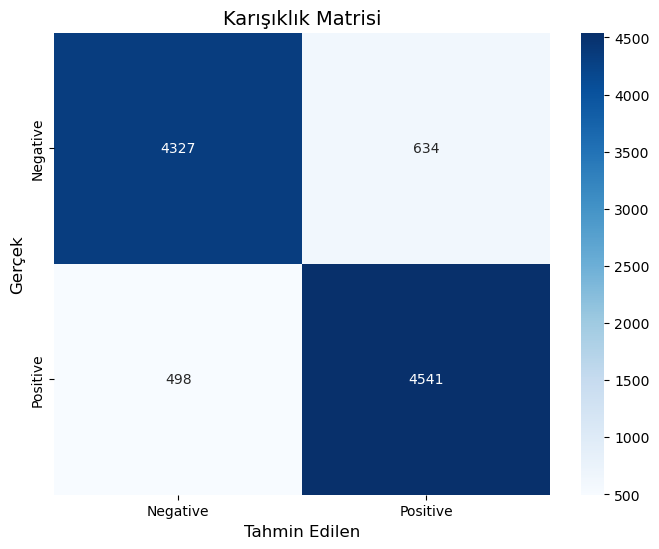

In [26]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred_log_reg)

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Tahmin Edilen", fontsize=12)
plt.ylabel("Gerçek", fontsize=12)
plt.title("Karışıklık Matrisi", fontsize=14)
plt.show()

### Ratgele Orman Modeli Egitme

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

# Tahmin ve Değerlendirme
y_pred_rf = rf_model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Test Doğruluk Skoru: {accuracy:.4f}")

Test Doğruluk Skoru: 0.8483


In [28]:
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred_rf))


Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



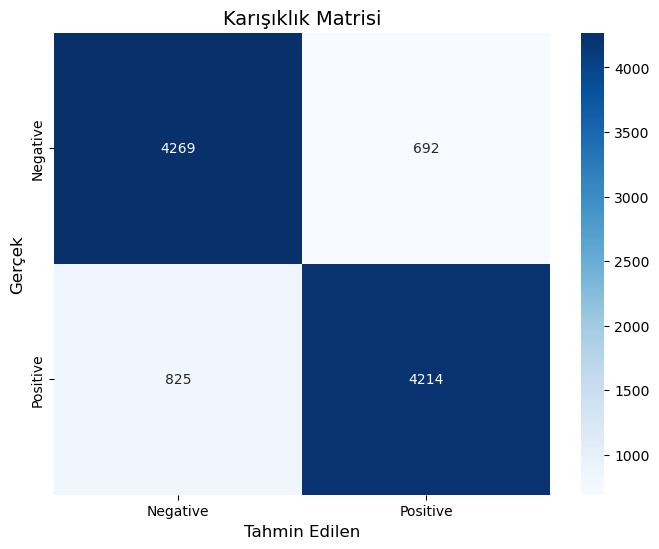

In [29]:
# Karışıklık Matrisi
cm = confusion_matrix(y_test, y_pred_rf)

# Karışıklık Matrisini Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Tahmin Edilen", fontsize=12)
plt.ylabel("Gerçek", fontsize=12)
plt.title("Karışıklık Matrisi", fontsize=14)
plt.show()

In [30]:
# Olumlu ve olumsuz duyarlılıklar icin en önemli kelimeleri kelime bulutlari veya cubuk grafikler kullanarak gorsellestirin.

import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [31]:
# Kelime ağırlıklarını logistic regression modelinden al
feature_names = tfidf_vectorizer.get_feature_names_out()
coef = log_reg.coef_[0]  # Logistic Regression katsayıları

In [32]:
# Olumlu ve olumsuz sınıflar için en önemli kelimeleri seç
top_positive_idx = np.argsort(coef)[-20:]  #En yüksek (pozitif sınıfa ait) 20 katsayının indekslerini alır.
top_negative_idx = np.argsort(coef)[:20]  #En düşük (negatif sınıfa ait) 20 katsayının indekslerini alır.

In [33]:
top_positive_words = [(feature_names[i], coef[i]) for i in top_positive_idx]
print("\nTop Pozitif Kelimeler:")
for word, weight in top_positive_words:
    print(f"{word}: {weight:.4f}")


Top Pozitif Kelimeler:
love: 3.5630
perfectly: 3.6351
entertaining: 3.6358
today: 3.7049
definitely: 3.7140
enjoyable: 3.8480
fantastic: 3.8785
highly: 3.9331
superb: 3.9564
enjoyed: 4.0260
hilarious: 4.1581
loved: 4.2879
favorite: 4.4207
brilliant: 4.5565
amazing: 4.6749
wonderful: 4.7980
best: 4.8666
perfect: 5.0353
excellent: 6.6076
great: 7.1088


In [34]:
# Top negatif kelimeleri hesaplama ve yazdırma
top_negative_words = [(feature_names[i], coef[i]) for i in top_negative_idx]
print("\nTop Negatif Kelimeler:")
for word, weight in top_negative_words:
    print(f"{word}: {weight:.4f}")


Top Negatif Kelimeler:
worst: -10.1950
waste: -7.8535
bad: -7.3043
awful: -7.2586
boring: -6.5114
terrible: -5.8782
poor: -5.7403
nothing: -5.4592
dull: -5.1568
poorly: -5.1555
worse: -4.9070
horrible: -4.8337
disappointing: -4.7002
disappointment: -4.5735
fails: -4.5255
unfortunately: -4.3745
supposed: -4.3575
lame: -4.3315
lacks: -4.2081
annoying: -4.1680


In [35]:
# 1. Kelime Bulutu Görselleştirme

# Olumlu sınıf kelime bulutu
positive_wordcloud = WordCloud(background_color="white", colormap="Blues").generate_from_frequencies(
    dict(top_positive_words)
)

# Olumsuz sınıf kelime bulutu
negative_wordcloud = WordCloud(background_color="white", colormap="Reds").generate_from_frequencies(
    dict(top_negative_words)
)

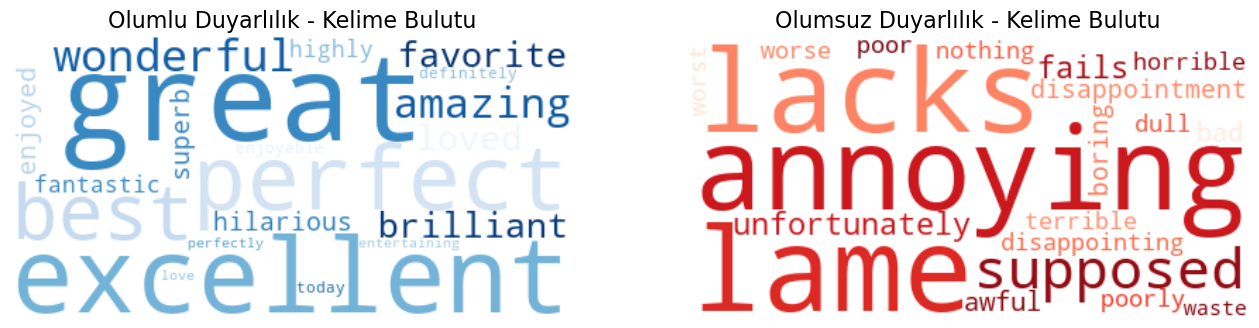

In [36]:
# Kelime bulutlarını çiz
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Olumlu Duyarlılık - Kelime Bulutu", fontsize=16)

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Olumsuz Duyarlılık - Kelime Bulutu", fontsize=16)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10468\1271508542.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(positive_weights), y=list(positive_words), palette="Blues_d")


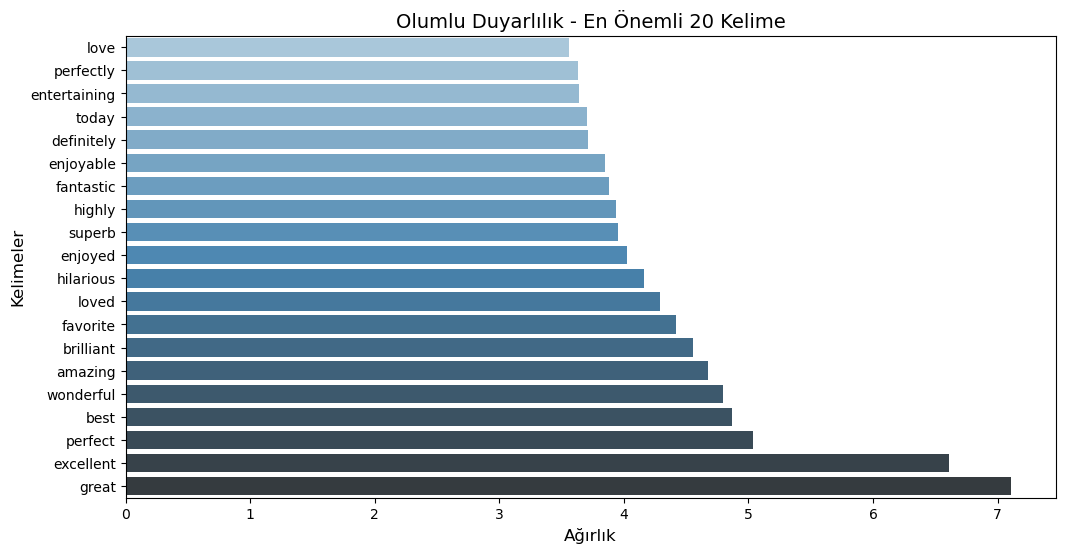

In [37]:
# 2. Çubuk Grafik Görselleştirme

# Olumlu sınıf çubuk grafiği
positive_words, positive_weights = zip(*top_positive_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(positive_weights), y=list(positive_words), palette="Blues_d")
#plt.barh(positive_words, positive_weights, color="blue", edgecolor="black")
plt.xlabel("Ağırlık", fontsize=12)
plt.ylabel("Kelimeler", fontsize=12)
plt.title("Olumlu Duyarlılık - En Önemli 20 Kelime", fontsize=14)
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_10468\1297238055.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(negative_weights), y=list(negative_words), palette="Reds_d")


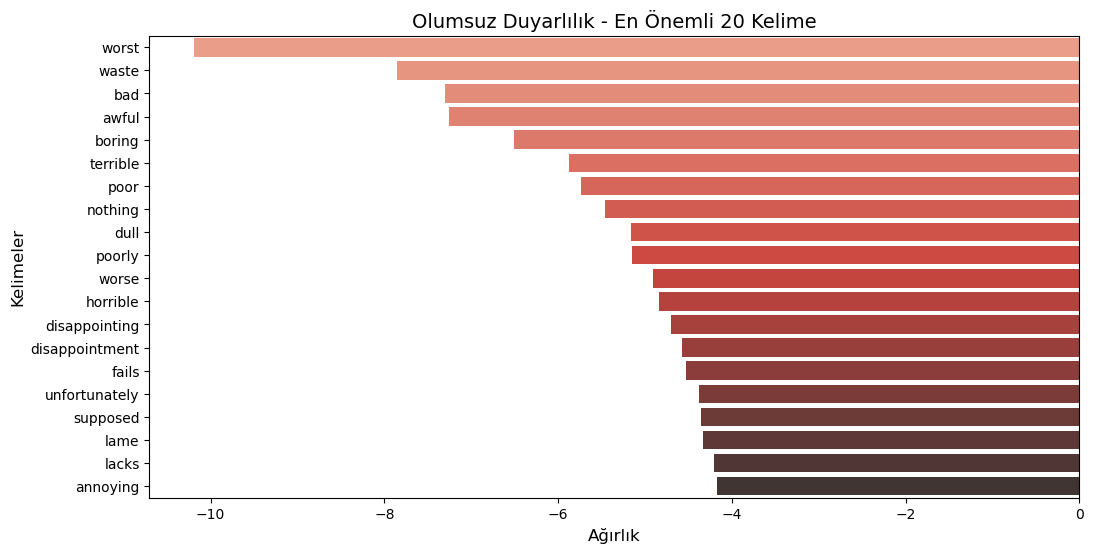

In [38]:
# Olumsuz sınıf çubuk grafiği
negative_words, negative_weights = zip(*top_negative_words)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(negative_weights), y=list(negative_words), palette="Reds_d")
#plt.barh(negative_words, negative_weights, color="red", edgecolor="black")
plt.xlabel("Ağırlık", fontsize=12)
plt.ylabel("Kelimeler", fontsize=12)
plt.title("Olumsuz Duyarlılık - En Önemli 20 Kelime", fontsize=14)
plt.show()

### FastText ile Sentiment Analizi

In [40]:
from gensim.models import FastText

# FastText modeli eğitme
model = FastText(sentences=df["cleaned_review"], vector_size=100, window=5, min_count=1, epochs=10)

# Modeli kaydetme
model.save("fasttext_gensim_model.bin")

# Modeli kullanarak kelime gömme (embedding)
word_vector = model.wv['good']  # 'good' kelimesinin vektörü
print(word_vector)  # 'good' kelimesinin vektörü

[-1.91949774e-03 -4.08146670e-03  5.24840201e-04  3.74532916e-04
 -8.96633952e-04 -8.43489834e-04  2.85870396e-04  2.03491421e-03
 -5.90141048e-04  1.14868977e-03 -3.51138460e-03 -1.18591450e-03
 -8.78890045e-04  2.53860326e-03  4.91146091e-03 -4.64782206e-04
  7.57891161e-04 -7.82049436e-04  1.00799580e-03  5.19186491e-03
  3.47896494e-05 -1.18347714e-04  8.31826939e-04  2.84332968e-03
 -3.11823026e-03 -1.78213255e-03  1.38604920e-03  3.97857837e-03
  1.49035687e-03  6.87029853e-04  1.53668223e-09 -1.63262454e-03
  1.49652449e-04 -1.83089101e-03  1.00335479e-03  2.44242372e-03
  2.13047140e-03  1.44276046e-03  1.72678637e-03  1.82151631e-03
  2.43349327e-03 -1.71864370e-03  4.23147203e-03  1.69702689e-03
  1.61930174e-03  8.52331519e-04  1.61125953e-03 -2.85128318e-03
  6.08038972e-04 -2.79350067e-03  8.22649512e-04  2.18957852e-04
  1.50161679e-03 -1.48814463e-03  3.60474852e-03  2.06487207e-03
 -8.31113648e-05 -2.26888107e-04  2.56288494e-03 -2.54068291e-03
  1.78641669e-04 -1.75385

In [41]:
# Yorumları vektörleştirme (kelime vektörlerinin ortalaması)
def get_average_vector(text, model):
    words = text.split()  # Yorumdaki kelimeleri ayırma
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)  # Kelimelerin vektörlerinin ortalaması
    else:
        return np.zeros(model.vector_size)  # Eğer hiç kelime bulunmazsa sıfır vektörü döndür

# Tüm yorumlar için ortalama vektörleri oluşturma
X_fasttext = np.array([get_average_vector(text, model) for text in df["cleaned_review"]])

In [42]:
# Eğitim ve test setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X_fasttext, y, test_size=0.2, random_state=42)

# Lojistik Regresyon modelini eğitme
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Test verisi üzerinde tahmin yapma
y_pred_ft = log_reg.predict(X_test)

# Model performansını değerlendirme
accuracy = accuracy_score(y_test, y_pred_ft)
print(f"FastText ile Model Doğruluk Skoru: {accuracy:.4f}")

FastText ile Model Doğruluk Skoru: 0.4961


In [43]:
# Performans değerlendirmesi
print(classification_report(y_test, y_pred_ft))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      4961
           1       0.00      0.00      0.00      5039

    accuracy                           0.50     10000
   macro avg       0.25      0.50      0.33     10000
weighted avg       0.25      0.50      0.33     10000



C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\user\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


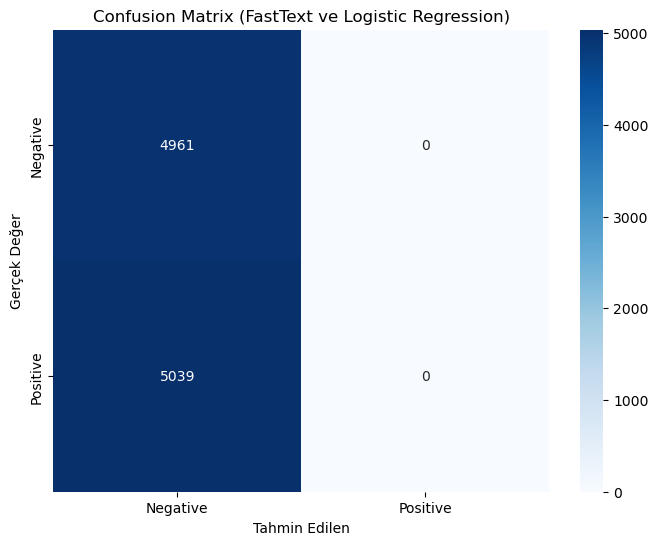

In [44]:
# Confusion Matrix hesaplama
conf_matrix = confusion_matrix(y_test, y_pred_ft)

# Confusion Matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek Değer')
plt.title('Confusion Matrix (FastText ve Logistic Regression)')
plt.show()


## 3. Konu Modelleme

### Yorumlardan konuları çıkarmak için LDA (Gizli Dirichlet Ayrımı) kullanın.

In [45]:
from sklearn.decomposition import LatentDirichletAllocation

# TF-IDF ile sayısallaştırılmış eğitim verisi
# Eğitim verisini hazırlama (önceki adımlarda olduğu gibi)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df["cleaned_review"])

# LDA Modeli
n_topics = 5  # Örneğin 5 konu tespiti yapalım
lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)

# LDA modelini fit etme
lda.fit(X_tfidf)

# Her bir konunun en yüksek ağırlıklı kelimelerini görselleştirelim
feature_names = tfidf_vectorizer.get_feature_names_out()

# Konuların kelimelerini yazdırma
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic #{topic_idx + 1}:")
    print(", ".join([feature_names[i] for i in topic.argsort()[:-11:-1]]))  # En yüksek 10 kelime
    print("\n")

Topic #1:
film, movie, one, story, life, like, people, would, films, time


Topic #2:
film, one, movie, good, great, also, role, best, like, cast


Topic #3:
movie, film, bad, like, one, even, good, really, dont, would


Topic #4:
movie, show, like, one, series, great, good, see, would, film


Topic #5:
movie, great, film, good, really, one, see, funny, movies, love




In [46]:
# Her bir yorumun hangi konuyu temsil ettiğini tahmin etme
topic_distribution = lda.transform(X_tfidf)

# Örneğin, ilk yorumun hangi konularda en yüksek olasılığa sahip olduğunu görelim
print("Topic distribution for the first review:", topic_distribution[0])

Topic distribution for the first review: [0.91746714 0.02049879 0.02066665 0.02090761 0.0204598 ]


### tutarlılık puanlarını kullanarak optimal konu sayisini belirleme

In [59]:
df["lemmatized_review"] = df["lemmatized_tokens"].apply(lambda tokens: " ".join(tokens))

In [60]:
from sklearn.decomposition import LatentDirichletAllocation
from gensim.models.coherencemodel import CoherenceModel
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import Dictionary

# Adım 1: Küçük bir veri seti kullanma (islem cok uzun sürd. icin veri setini daralttim)
df_sampled = df.sample(n=1000, random_state=42)  # 1000 örnekle çalışalım

# Adım 2: Sayısallaştırma işlemi ( Daha iyi sonuc verdigi icin CountVectorizer kullandim)
vectorizer = CountVectorizer(max_features=1000) 
X_bow = vectorizer.fit_transform(df_sampled["lemmatized_review"])

# Adım 3: Konu sayısı aralığını belirleme
topic_range = range(2, 11)  

coherence_scores = []

# Adım 4: Gensim için Dictionary oluşturma
dictionary = Dictionary(df_sampled["lemmatized_tokens"])

# Adım 5: LDA ile model eğitimi ve tutarlılık puanı hesaplama
for n_topics in topic_range:
    lda_model = LatentDirichletAllocation(n_components=n_topics, random_state=42)
    lda_model.fit(X_bow)

    # Konu kelimelerini almak
    feature_names = vectorizer.get_feature_names_out()
    lda_topics = [[feature_names[i] for i in topic.argsort()[:-11:-1]] for topic in lda_model.components_]
    
    # Gensim'in CoherenceModel'ini kullanarak tutarlılık puanı hesaplama
    coherence_model = CoherenceModel(topics=lda_topics, texts=df_sampled["lemmatized_tokens"], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)
    print(f"Konu sayısı: {n_topics}, Tutarlılık puanı: {coherence_score:.4f}")

Konu sayısı: 2, Tutarlılık puanı: 0.3614
Konu sayısı: 3, Tutarlılık puanı: 0.3537
Konu sayısı: 4, Tutarlılık puanı: 0.3548
Konu sayısı: 5, Tutarlılık puanı: 0.3498
Konu sayısı: 6, Tutarlılık puanı: 0.3447
Konu sayısı: 7, Tutarlılık puanı: 0.3470
Konu sayısı: 8, Tutarlılık puanı: 0.3611
Konu sayısı: 9, Tutarlılık puanı: 0.3581
Konu sayısı: 10, Tutarlılık puanı: 0.3424


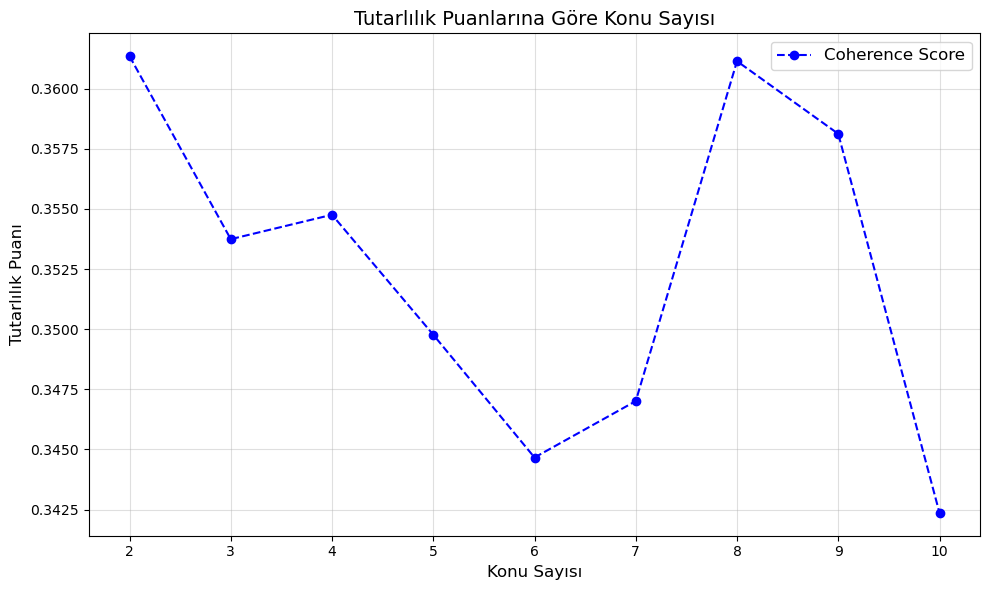

Optimal Konu Sayısı: 2


In [50]:
# Adım 6: Tutarlılık puanlarını görselleştirme
plt.figure(figsize=(10, 6))
plt.plot(topic_range, coherence_scores, marker='o', linestyle='--', color='b', label='Coherence Score')
plt.title("Tutarlılık Puanlarına Göre Konu Sayısı", fontsize=14)
plt.xlabel("Konu Sayısı", fontsize=12)
plt.ylabel("Tutarlılık Puanı", fontsize=12)
plt.xticks(topic_range)
plt.grid(alpha=0.4)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

# En iyi konu sayısını yazdırma
optimal_topics = topic_range[np.argmax(coherence_scores)]
print(f"Optimal Konu Sayısı: {optimal_topics}")


### Her konu için en önemli kelimeleri gösterme

In [51]:
# LDA modelinden her bir konu için en önemli kelimeleri listeleme
n_top_words = 10  # Her konu için en yüksek 10 kelimeyi alacağız
feature_names = vectorizer.get_feature_names_out()

for topic_idx, topic in enumerate(lda_model.components_):
    print(f"\nTopic #{topic_idx + 1}:")
    top_words_idx = topic.argsort()[:-n_top_words-1:-1]  # En yüksek 10 kelimenin indekslerini alıyoruz
    top_words = [feature_names[i] for i in top_words_idx]  # İndekslerden kelimeleri alıyoruz
    print(", ".join(top_words))


Topic #1:
series, show, character, episode, comedy, first, funny, story, like, season

Topic #2:
movie, one, good, time, space, zombie, like, two, make, really

Topic #3:
show, movie, like, love, one, would, character, much, make, best

Topic #4:
movie, film, one, like, bad, even, dont, good, really, get

Topic #5:
movie, one, girl, people, see, also, many, love, like, well

Topic #6:
movie, good, film, time, would, made, watch, funny, like, original

Topic #7:
show, many, like, kid, good, get, time, would, killer, thing

Topic #8:
film, one, time, like, see, scene, first, would, way, character

Topic #9:
film, one, get, make, good, like, character, life, movie, great

Topic #10:
film, audience, one, see, peter, performance, story, great, many, character


### Konuları ve yorumlar arasındaki dağılımları görselleştirme 

In [52]:
# 1. Konuların her bir yorum için nasıl dağıldığını görmek (Topic Distribution)

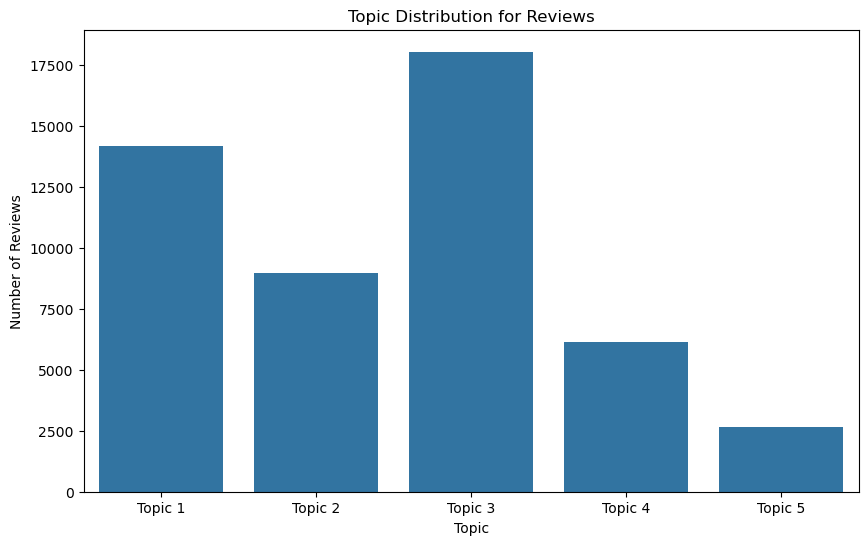

In [53]:
n_topics = 5

# Her yorum için konuların olasılıklarını hesaplayalım
topic_distribution = lda.transform(X_tfidf)

# Her yorum için en yüksek olasılığa sahip konuyu bulalım
dominant_topics = np.argmax(topic_distribution, axis=1)

# Konuların dağılımını görselleştirelim
plt.figure(figsize=(10, 6))
sns.countplot(x=dominant_topics)
sns.set_palette("Blues_d")
plt.title("Topic Distribution for Reviews")
plt.xlabel("Topic")
plt.ylabel("Number of Reviews")
plt.xticks(ticks=np.arange(n_topics), labels=[f"Topic {i+1}" for i in range(n_topics)])
plt.show()

In [54]:
# 2. Konuların kelimelerle olan ilişkisini görselleştirmek

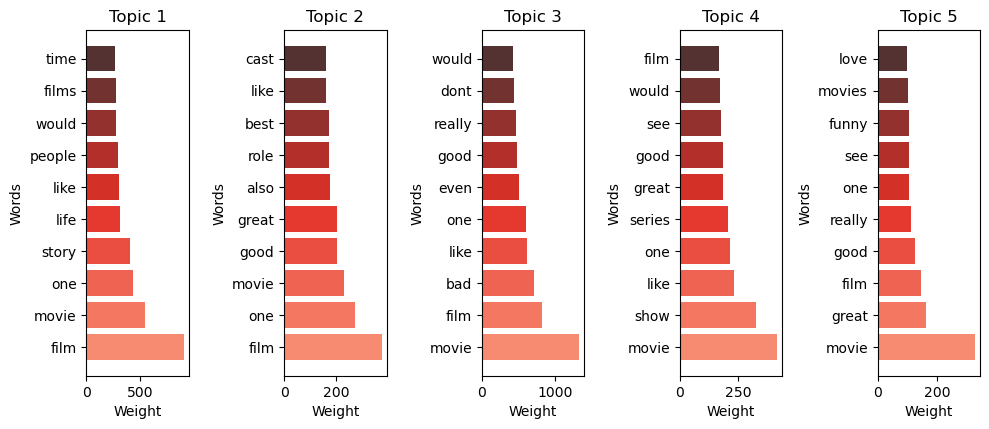

In [55]:
# Her bir konunun en önemli kelimelerini listele
n_top_words = 10
feature_names = tfidf_vectorizer.get_feature_names_out()

plt.figure(figsize=(10, 8))
for topic_idx, topic in enumerate(lda.components_):
    top_words_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    
    # Renk paletini 'Reds_d' ile ayarlıyoruz
    colors = sns.color_palette("Reds_d", n_top_words)
    
    plt.subplot(2, 5, topic_idx + 1)
    plt.barh(top_words, topic[top_words_idx], color=colors)
    plt.title(f"Topic {topic_idx + 1}")
    plt.xlabel("Weight")
    plt.ylabel("Words")
    
plt.tight_layout()
plt.show()

# Kelime Gömmeleri ve Derin Öğrenme ile NLP

### Yorumları yoğun vektör uzayında temsil etmek için kelime gömmelerini (örneğin, Word2Vec, GloVe) uygulayın.

### Word2Vec Uygulaması

In [94]:
from gensim.models import Word2Vec

# Tokenize edilmiş yorumları alalım
sentences = df["lemmatized_tokens"].tolist()

# Word2Vec modelini eğitelim
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=1, workers=4)

In [57]:
# Yorumları vektörleştirmek için kelimelerin vektörlerinin ortalamasını alalım
def get_average_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Kelime bulunamazsa sıfır vektörü

# Tüm yorumlar için ortalama vektörler oluşturma
X_word2vec = np.array([get_average_vector(text, model) for text in df["lemmatized_tokens"]])

# X_word2vec, yorumların Word2Vec gömme vektörlerinin ortalamalarını içeriyor

### Kelime gömmelerini kullanarak duygu analizi için basit bir derin öğrenme modeli (LSTM veya CNN) eğitin.

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam

# Temizlenmiş ve lemmatize edilmiş yorumları kullanalim
X = df["lemmatized_review"] 
y = df["sentiment_encoded"] 

# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [62]:
# Yorumları vektörleştirmek için kelimelerin vektörlerinin ortalamasını alalım
def get_average_vector(tokens, model):
    word_vectors = [model.wv[word] for word in tokens if word in model.wv]
    if word_vectors:
        return np.mean(word_vectors, axis=0)
    else:
        return np.zeros(model.vector_size)  # Kelime bulunamazsa sıfır vektörü

# Tüm yorumlar için ortalama vektörler oluşturma
X_word2vec = np.array([get_average_vector(text, word2vec_model) for text in df["lemmatized_tokens"]])

In [63]:
from tensorflow.keras.callbacks import EarlyStopping

# Eğitim ve test setlerine ayıralım
X_train_word2vec, X_test_word2vec = X_word2vec[:len(X_train)], X_word2vec[len(X_train):]

# Modeli tanımlıyoruz
model = Sequential()

# Embedding katmanını ekliyoruz
model.add(Embedding(input_dim=len(word2vec_model.wv), output_dim=100))
model.add(SpatialDropout1D(0.2))

# LSTM katmanı - Hücre sayısını azalttık
model.add(LSTM(50, dropout=0.2, recurrent_dropout=0.2))

# Çıktı katmanı
model.add(Dense(1, activation='sigmoid'))

# Modeli derliyoruz
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Early stopping ekliyoruz (val_loss iyileşmezse durdurur)
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Modeli eğitiyoruz
history = model.fit(X_train_word2vec, y_train, epochs=5, batch_size=128, validation_data=(X_test_word2vec, y_test), verbose=1, callbacks=[early_stopping])

# Modelin başarısını test seti üzerinde değerlendirelim
test_loss, test_accuracy = model.evaluate(X_test_word2vec, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 113s 343ms/step - accuracy: 0.4969 - loss: 0.6935 - val_accuracy: 0.5039 - val_loss: 0.6931
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 89s 282ms/step - accuracy: 0.5032 - loss: 0.6933 - val_accuracy: 0.5039 - val_loss: 0.6937
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 278ms/step - accuracy: 0.5007 - loss: 0.6933 - val_accuracy: 0.5049 - val_loss: 0.6931
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 87s 277ms/step - accuracy: 0.4970 - loss: 0.6933 - val_accuracy: 0.4949 - val_loss: 0.6933
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 86s 273ms/step - accuracy: 0.4975 - loss: 0.6933 - val_accuracy: 0.4949 - val_loss: 0.6933
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5025 - loss: 0.6932
Test Loss: 0.693138837814331
Test Accuracy: 0.5048999786376953


In [65]:
# Tahmin yapma
y_pred_lstm_prob = model.predict(X_test_word2vec)

# Olasılıkları sınıf tahminine dönüştürme
y_pred_lstm = (y_pred_lstm_prob >= 0.5).astype(int)

# İlk birkaç tahmini ve gerçek değerleri kontrol edelim
print("Tahminler:", y_pred_lstm[:10].flatten())
print("Gerçek Değerler:", y_test[:10].values)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step
Tahminler: [1 0 1 1 1 1 1 1 1 1]
Gerçek Değerler: [1 1 0 1 0 1 1 1 0 0]


In [66]:
# Sınıflandırma raporu
print("Classification Report for LSTM Model:")
print(classification_report(y_test, y_pred_lstm))

Classification Report for LSTM Model:
              precision    recall  f1-score   support

           0       0.50      0.18      0.27      4961
           1       0.51      0.82      0.63      5039

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.45     10000
weighted avg       0.50      0.50      0.45     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


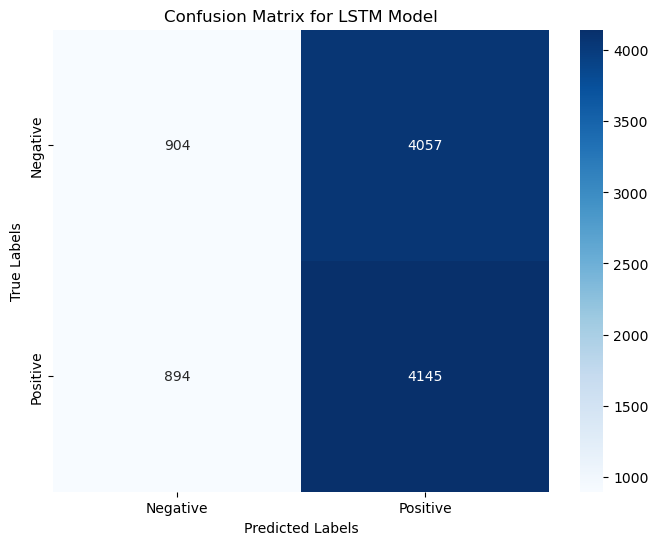

In [67]:
# Test setindeki tahminleri al (0.5 eşik değerine göre)
y_pred_lstm = (model.predict(X_test_word2vec) > 0.5).astype("int32")

# Confusion matrix'i oluştur
conf_matrix = confusion_matrix(y_test, y_pred_lstm)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for LSTM Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [68]:
# Precision (Hassasiyet): Modelin pozitif sınıfı doğru tahmin etme oranı oldukça düşük olabilir, 
# çünkü false positive (FP) sayısı çok yüksek. 
# Yani, model pozitif tahmin ettiği zaman bu tahminlerin çoğu yanlış.

# Recall (Duyarlılık): Pozitif sınıf için recall iyi görünüyor (4145 doğru pozitif, 894 yanlış negatif), 
# ancak yine de yanlış negatiflerin sayısının yüksek olması, 
# modelin daha fazla pozitif örneği doğru şekilde tahmin etmesi gerektiğini gösteriyor.

### CNN Modeli Eğitme

In [101]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Eğitim ve test setlerine ayıralım
X_train_word2vec, X_test_word2vec = X_word2vec[:len(X_train)], X_word2vec[len(X_train):]

# Modeli tanımlıyoruz
model = Sequential()

# Embedding katmanını ekliyoruz
model.add(Embedding(input_dim=len(word2vec_model.wv), output_dim=100))

# Spatial Dropout ekliyoruz
model.add(SpatialDropout1D(0.3))

# 1D Convolutional katmanı
model.add(Conv1D(filters=128, kernel_size=5, padding='valid', activation='relu'))

# MaxPooling katmanı
model.add(MaxPooling1D(pool_size=2))

# Flatten katmanı - CNN'in çıktısını düzleştiriyoruz
model.add(Flatten())

# Dense katman
model.add(Dense(1, activation='sigmoid'))  # Sigmoid çıktısı, binary classification

# Modeli derliyoruz
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Early stopping ekliyoruz
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Modeli eğitiyoruz
history = model.fit(X_train_word2vec, y_train, epochs=10, batch_size=64, validation_data=(X_test_word2vec, y_test), verbose=1, callbacks=[early_stopping])

# Modelin başarısını test seti üzerinde değerlendirelim
test_loss, cnn_test_accuracy = model.evaluate(X_test_word2vec, y_test, verbose=1)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {cnn_test_accuracy}")


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 148s 232ms/step - accuracy: 0.4951 - loss: 0.6939 - val_accuracy: 0.4953 - val_loss: 0.6933
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 201s 231ms/step - accuracy: 0.5031 - loss: 0.6934 - val_accuracy: 0.4895 - val_loss: 0.6934
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 144s 231ms/step - accuracy: 0.5051 - loss: 0.6931 - val_accuracy: 0.4916 - val_loss: 0.6936
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 198s 224ms/step - accuracy: 0.5050 - loss: 0.6930 - val_accuracy: 0.5023 - val_loss: 0.6937
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4989 - loss: 0.6933
Test Loss: 0.6932777762413025
Test Accuracy: 0.4952999949455261


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


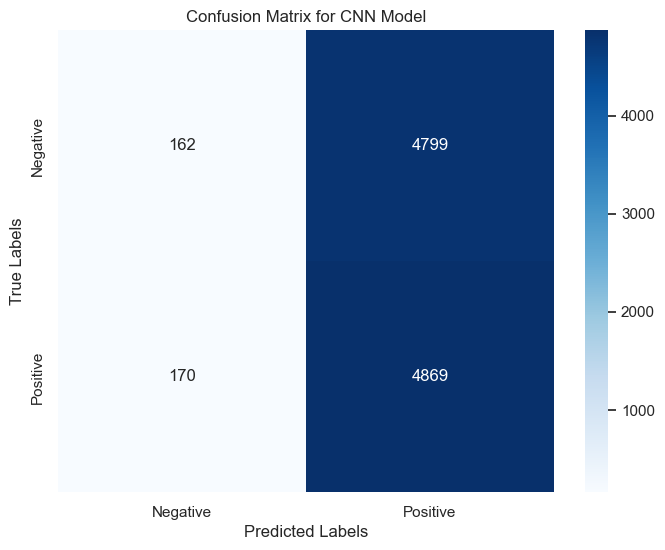

Classification Report for CNN Model:
              precision    recall  f1-score   support

    Negative       0.49      0.03      0.06      4961
    Positive       0.50      0.97      0.66      5039

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.36     10000
weighted avg       0.50      0.50      0.36     10000



In [80]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Test setindeki tahminleri al (eşik değeri 0.5)
y_pred_cnn = (model.predict(X_test_word2vec) > 0.5).astype("int32")

# Confusion Matrix'i oluştur
conf_matrix = confusion_matrix(y_test, y_pred_cnn)

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix for CNN Model")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Classification Report
print("Classification Report for CNN Model:")
print(classification_report(y_test, y_pred_cnn, target_names=["Negative", "Positive"]))

In [ ]:
### Derin öğrenme Modellerinin Performansını geleneksel makine öğrenmesi modlleri ile kıyaslama 

In [97]:
# Lojistik Regresyon için Word2Vec Kullanma

# Yorumları vektörleştirelim (Word2Vec)
X_word2vec = np.array([get_average_vector(text, word2vec_model) for text in df["lemmatized_tokens"]])

# Eğitim ve test setlerine ayıralım
X_train_word2vec, X_test_word2vec = train_test_split(X_word2vec, test_size=0.2, random_state=42)

# Lojistik Regresyon Modeli Tanımlama
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Modeli Word2Vec vektörleri ile eğitelim
log_reg.fit(X_train_word2vec, y_train)

# Test Verisi Üzerinde Tahmin Yapma
y_pred_log_reg = log_reg.predict(X_test_word2vec)

# Model Performansını Değerlendirme
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Lojistik Regresyon Test Doğruluk Skoru: {accuracy_log_reg:.4f}")

# Classification Report
print("\nLojistik Regresyon Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Lojistik Regresyon Test Doğruluk Skoru: 0.8612

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      4961
           1       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



In [98]:
# Random Forest için Word2Vec Vektörleriyle Eğitim
# Yorumları vektörleştirelim (Word2Vec)
X_word2vec = np.array([get_average_vector(text, word2vec_model) for text in df["lemmatized_tokens"]])

# Eğitim ve test setlerine ayıralım
X_train_word2vec, X_test_word2vec, y_train, y_test = train_test_split(X_word2vec, y, test_size=0.2, random_state=42)

# Random Forest Modeli Tanımlama
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli Word2Vec vektörleri ile eğitelim
rf_model.fit(X_train_word2vec, y_train)

# Test Verisi Üzerinde Tahmin Yapma
y_pred_rf = rf_model.predict(X_test_word2vec)

# Model Performansını Değerlendirme
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Doğruluk Skoru: {accuracy_rf:.4f}")

# Classification Report
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Test Doğruluk Skoru: 0.8373

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.83      4961
           1       0.83      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [99]:
#kıyaslama

In [102]:
# Model isimleri
models = ['Logistic Regression', 'Random Forest', 'LSTM', 'CNN']

# Her modelin doğruluk skoru
accuracies = [accuracy_log_reg, accuracy_rf, test_accuracy, cnn_test_accuracy]

# Her modelin precision, recall, f1-score ortalamaları
precision = [
    classification_report(y_test, y_pred_log_reg, output_dict=True)['accuracy'],
    classification_report(y_test, y_pred_rf, output_dict=True)['accuracy'],
    classification_report(y_test, y_pred_lstm, output_dict=True)['accuracy'],
    classification_report(y_test, y_pred_cnn, output_dict=True)['accuracy']
]

recall = [
    classification_report(y_test, y_pred_log_reg, output_dict=True)['weighted avg']['recall'],
    classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['recall'],
    classification_report(y_test, y_pred_lstm, output_dict=True)['weighted avg']['recall'],
    classification_report(y_test, y_pred_cnn, output_dict=True)['weighted avg']['recall']
]

f1_score = [
    classification_report(y_test, y_pred_log_reg, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_rf, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_lstm, output_dict=True)['weighted avg']['f1-score'],
    classification_report(y_test, y_pred_cnn, output_dict=True)['weighted avg']['f1-score']
]

# Sonuçları DataFrame'e dökelim
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
})

# Sonuçları sıralayarak yazdıralım
print(results.sort_values(by='Accuracy', ascending=False))

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.8612     0.8612  0.8612  0.861180
1        Random Forest    0.8373     0.8373  0.8373  0.837276
2                 LSTM    0.5031     0.5049  0.5049  0.448189
3                  CNN    0.4953     0.5031  0.5031  0.364017
